In [1]:
# Importing necessary libraries used for data cleaning, and data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

# Ignoring ununnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# Importing library to split the data into training part and testing part.
from sklearn.model_selection import train_test_split

# Chi Square
from sklearn.feature_selection import chi2
import scipy.stats as stats

# Importing library to process the data (Normalize the data)
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Importing Models (used for making prediction)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC                            # Support vector machine model
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

# Importing metrics used for evaluation of our models
from sklearn import metrics
from sklearn.metrics import classification_report

# Hyperparameter tuner and Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler

In [2]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
pd.set_option('display.max_columns',29)

**Data collection**

In [3]:
df=pd.read_csv("/kidney.csv")

In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,18.0,1.1,141.0,3.5,15.8,53,6800,6.1,no,no,no,good,no,no,notckd


# Exploratory Data Analysis (EDA)

In [6]:
# Checking the number of rows and columns in our dataset
df.shape

(400, 26)

 Dataset contains 400 rows and 26 columns

In [7]:
# Getting more information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

**Observations:**
- There are many null values in our dataset. We will replace null values in Data Preprocessing part.

In [8]:
# Getting some statistical information of our data
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


- Count of each column is different which indicates presence of null values. We already seen that there is null values in our dataset
- Our dataset contains age range from 2 to 90 years.

In [9]:
df["classification"].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [10]:
for i in df.drop("id",axis=1).columns:
    print('Unique Values in "{}":\n'.format(i),df[i].unique(), "\n\n")

Unique Values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] 


Unique Values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] 


Unique Values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025] 


Unique Values in "al":
 [ 1.  4.  2.  3.  0. nan  5.] 


Unique Values in "su":
 [ 0.  3.  4.  1. nan  2.  5.] 


Unique Values in "rbc":
 [nan 'normal' 'abnormal'] 


Unique Values in "pc":
 ['normal' 'abnormal' nan] 


Unique Values in "pcc":
 ['notpresent' 'present' nan] 


Unique Values in "ba":
 ['notpresent' 'present' nan] 


Unique Values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 17

**Observations:**
- Data cleaning much needed as there is \t after a word. 
- For ex. Classification should be only ckd or notckd but there is one extra variable i.e. ckd\t. It should be actually ckd. Hence Data Cleaning much needed.

- Columns from where we have to remove "\t" is: pcv, wc, rc, dm, cad, classification

# Feature Engineering

## Replacing "\t"


## Handling Null Values

- Lets check null values in form of a graph first

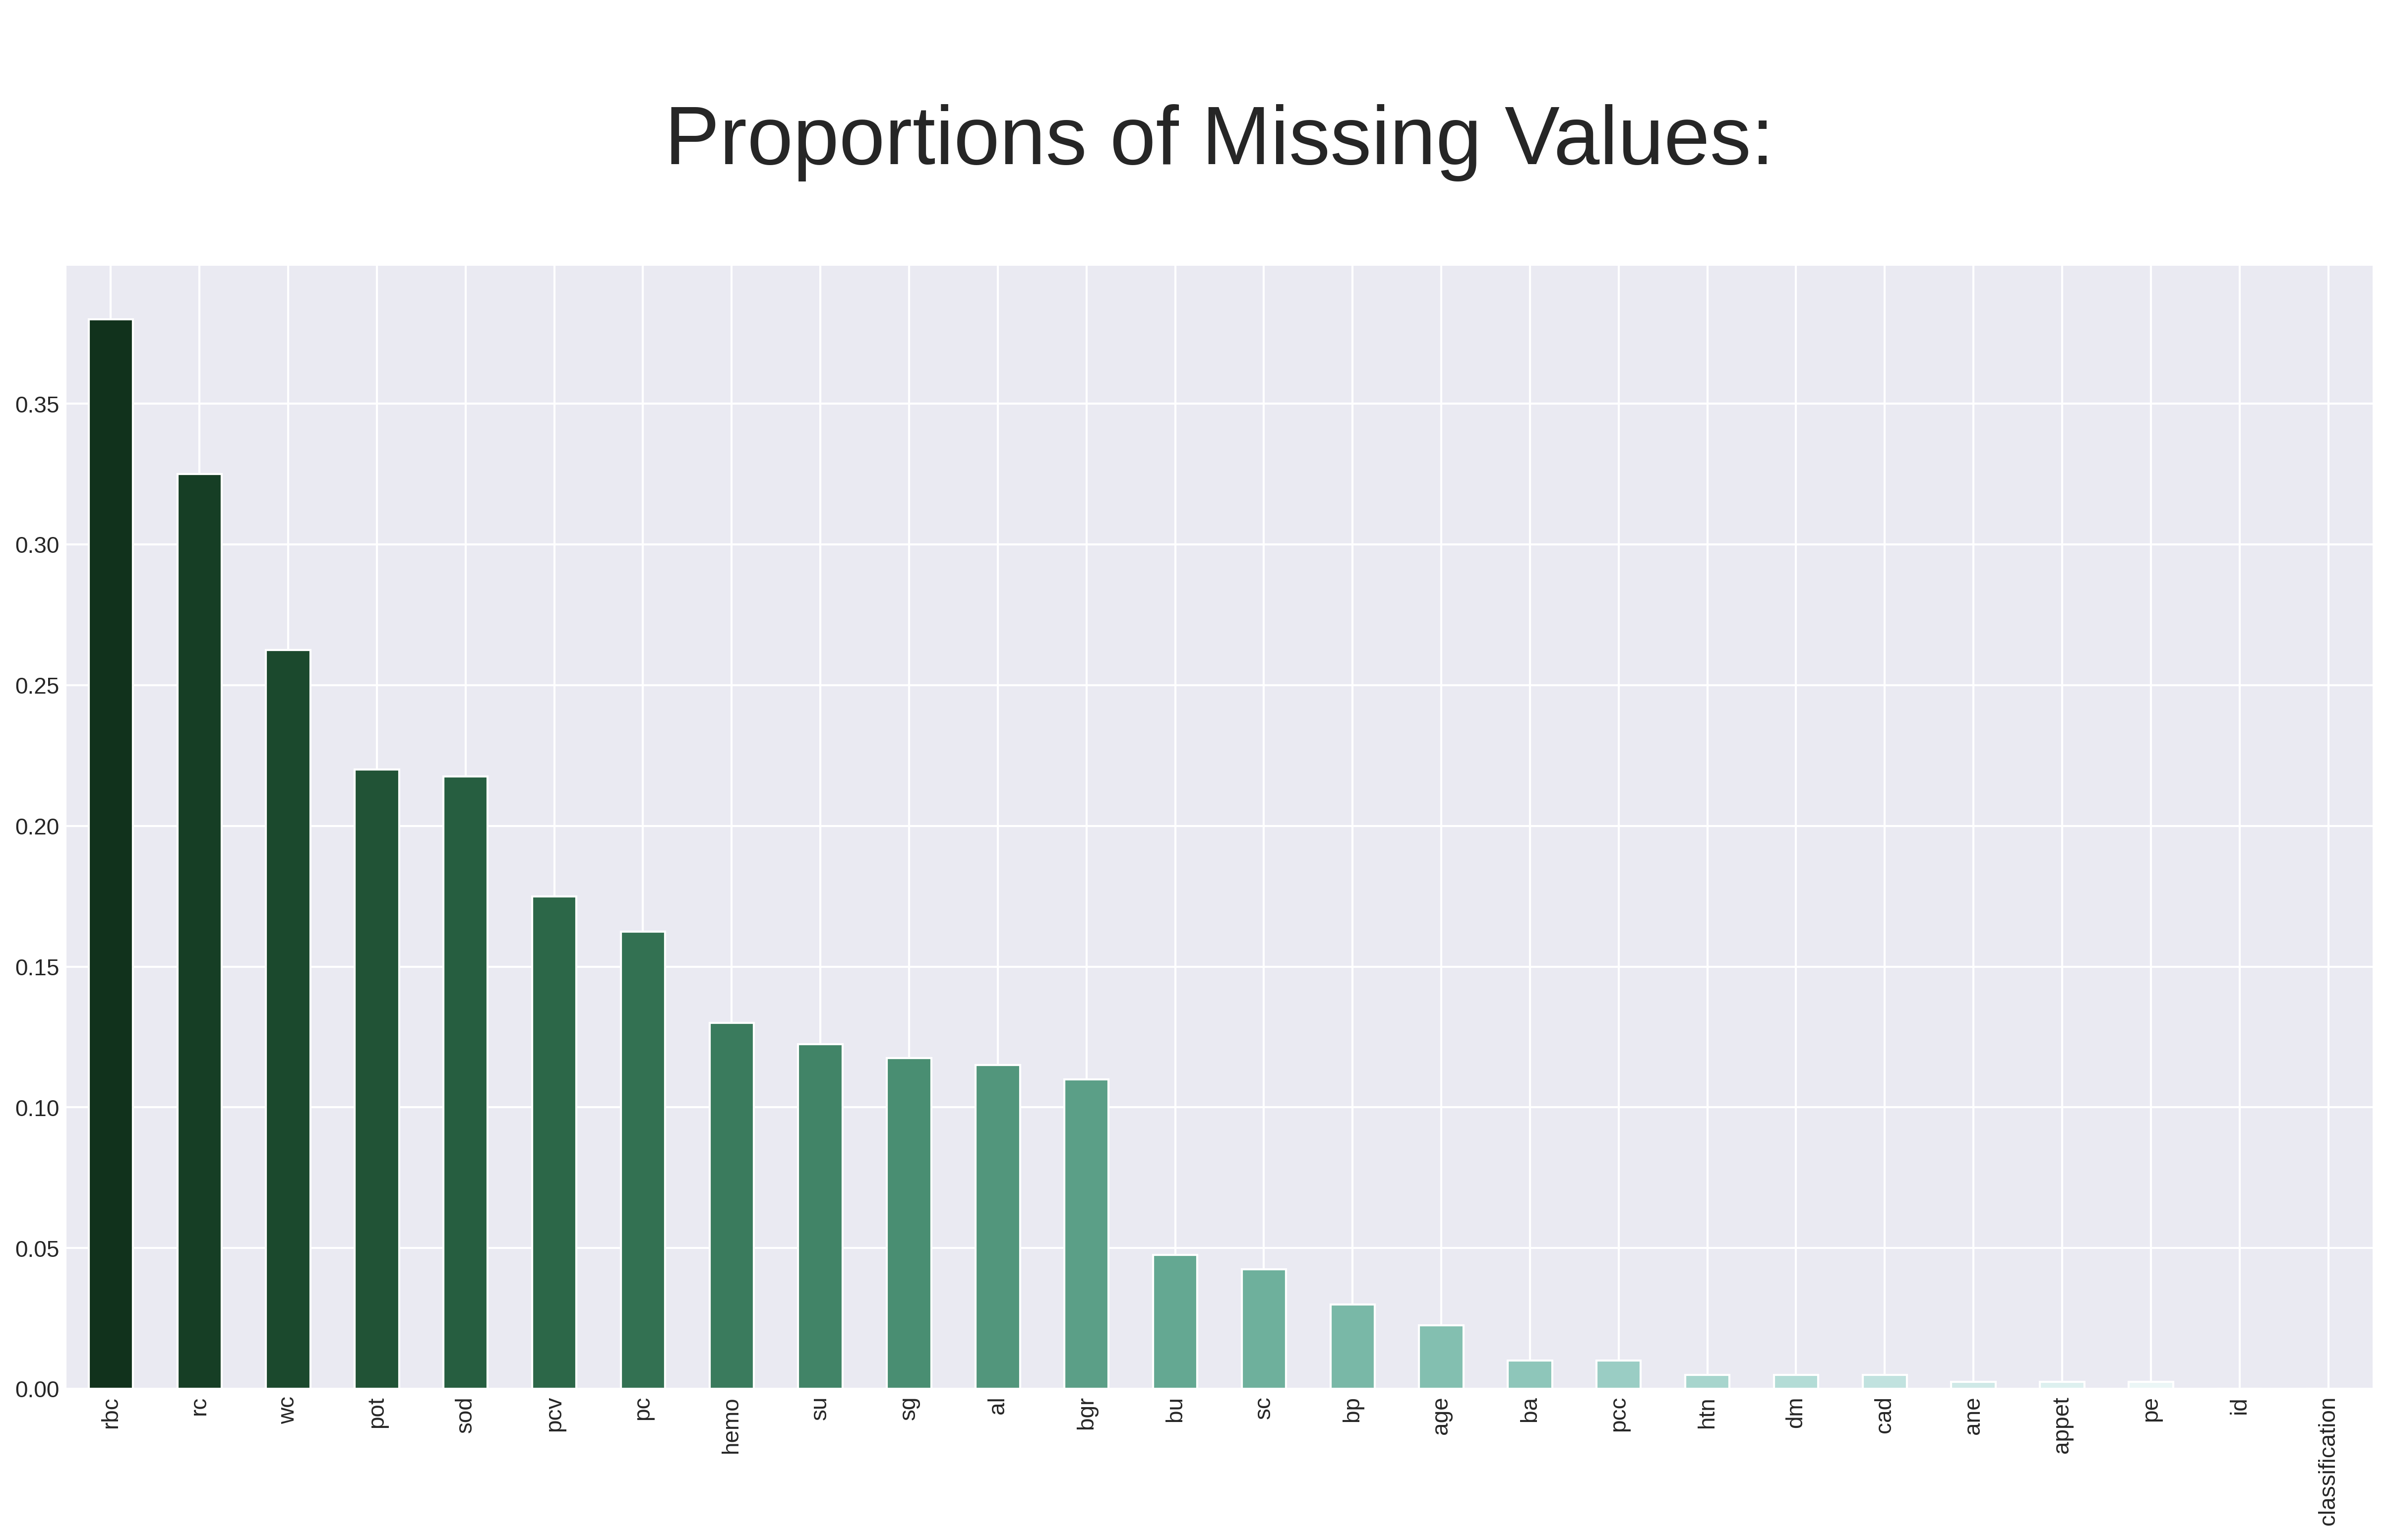

In [11]:
style.use('seaborn-darkgrid')

d = ((df.isnull().sum()/df.shape[0])).sort_values(ascending=False)
# Here we are plotting null values in range of 0-1. It means y axis range is 0-1.
# If bar graph show 0.5 null values that means there are 50% null values in that particular column.
# Hence we are dividing number of null values of each column with total number of rows i.e. 400 (or df.shape[0])

d.plot(kind = 'bar',
       color = sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

**Observations:**
- From this graph we can observe that rbc (Red Blood Cell) column have highest null values followed by rc (Red Blood Cell count), wc (White Blood Cell count), etc.

### Age

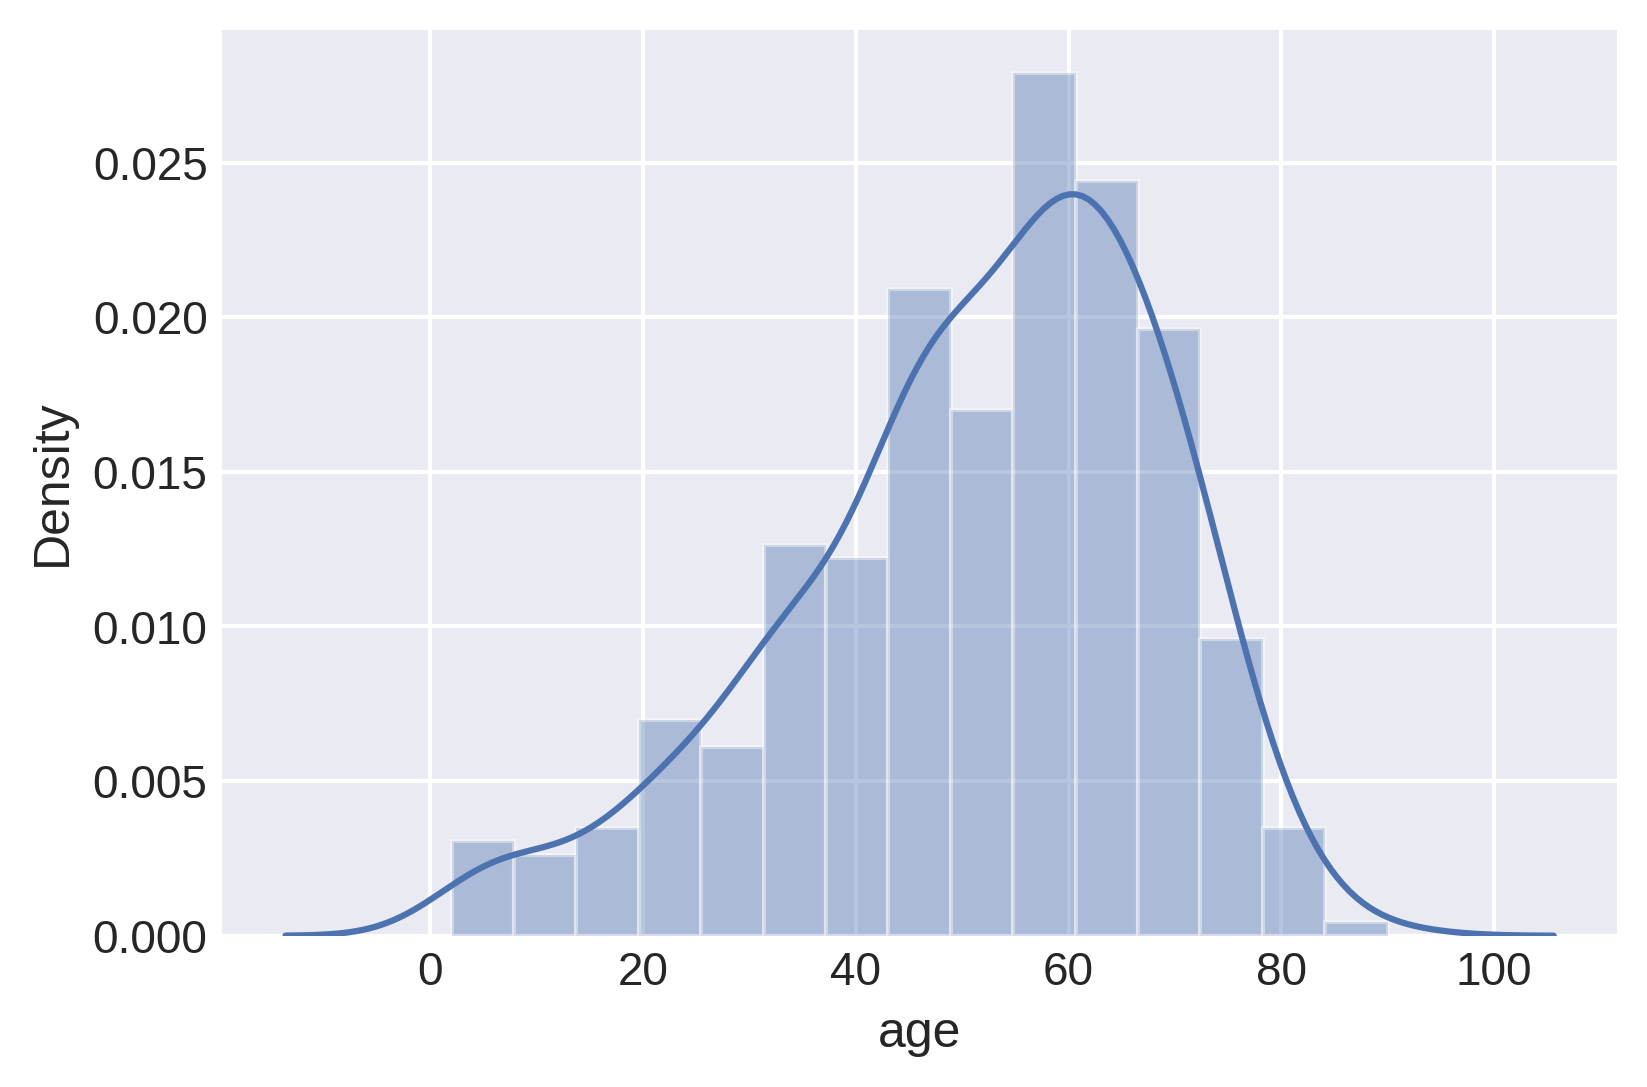

In [12]:
sns.distplot(df.age)

- As data seems little negative skewed, we will replace age null values with median

In [13]:
df["age"] = df["age"].replace(np.NaN, df["age"].median())

### Blood Pressure (bp)

In [14]:
df.bp.unique()

array([ 80.,  50.,  70.,  90.,  nan, 100.,  60., 110., 140., 180., 120.])

In [15]:
df.bp.mode()[0]

80.0

In [16]:
df.bp = df.bp.replace(np.NaN, df.bp.mode()[0])

### Specific Gravity (sg)

In [17]:
df.sg.unique()

array([1.02 , 1.01 , 1.005, 1.015,   nan, 1.025])

In [18]:
df.sg.mode()[0]

1.02

In [19]:
df.sg = df.sg.replace(np.NaN, df.sg.mode()[0])

### Aluminium (al)

In [20]:
df.al.unique()

array([ 1.,  4.,  2.,  3.,  0., nan,  5.])

In [21]:
df.al.mode()[0]

0.0

In [22]:
df.al = df.al.replace(np.NaN, df.al.mode()[0])

### Sugar (su)

In [23]:
df.su.unique()

array([ 0.,  3.,  4.,  1., nan,  2.,  5.])

In [24]:
df.su.mode()[0]

0.0

In [25]:
df.su = df.su.replace(np.NaN, df.su.mode()[0])

### Red blood cell (rbc)

In [26]:
df.su.unique()

array([0., 3., 4., 1., 2., 5.])

In [27]:
df.rbc.mode()[0]

'normal'

In [28]:
df.rbc = df.rbc.replace(np.NaN, df.rbc.mode()[0])

### pc

In [29]:
df.pc.unique()

array(['normal', 'abnormal', nan], dtype=object)

In [30]:
df.pc.mode()[0]

'normal'

In [31]:
df.pc = df.pc.replace(np.NaN, df.pc.mode()[0])

###pcc

In [32]:
df.pcc.unique()

array(['notpresent', 'present', nan], dtype=object)

In [33]:
df.pcc.mode()[0]

'notpresent'

In [34]:
df.pcc = df.pcc.replace(np.NaN, df.pcc.mode()[0])

##ba

In [35]:
df.ba.unique()

array(['notpresent', 'present', nan], dtype=object)

In [36]:
df.ba.mode()[0]

'notpresent'

In [37]:
df.ba = df.ba.replace(np.NaN, df.ba.mode()[0])

###bgr

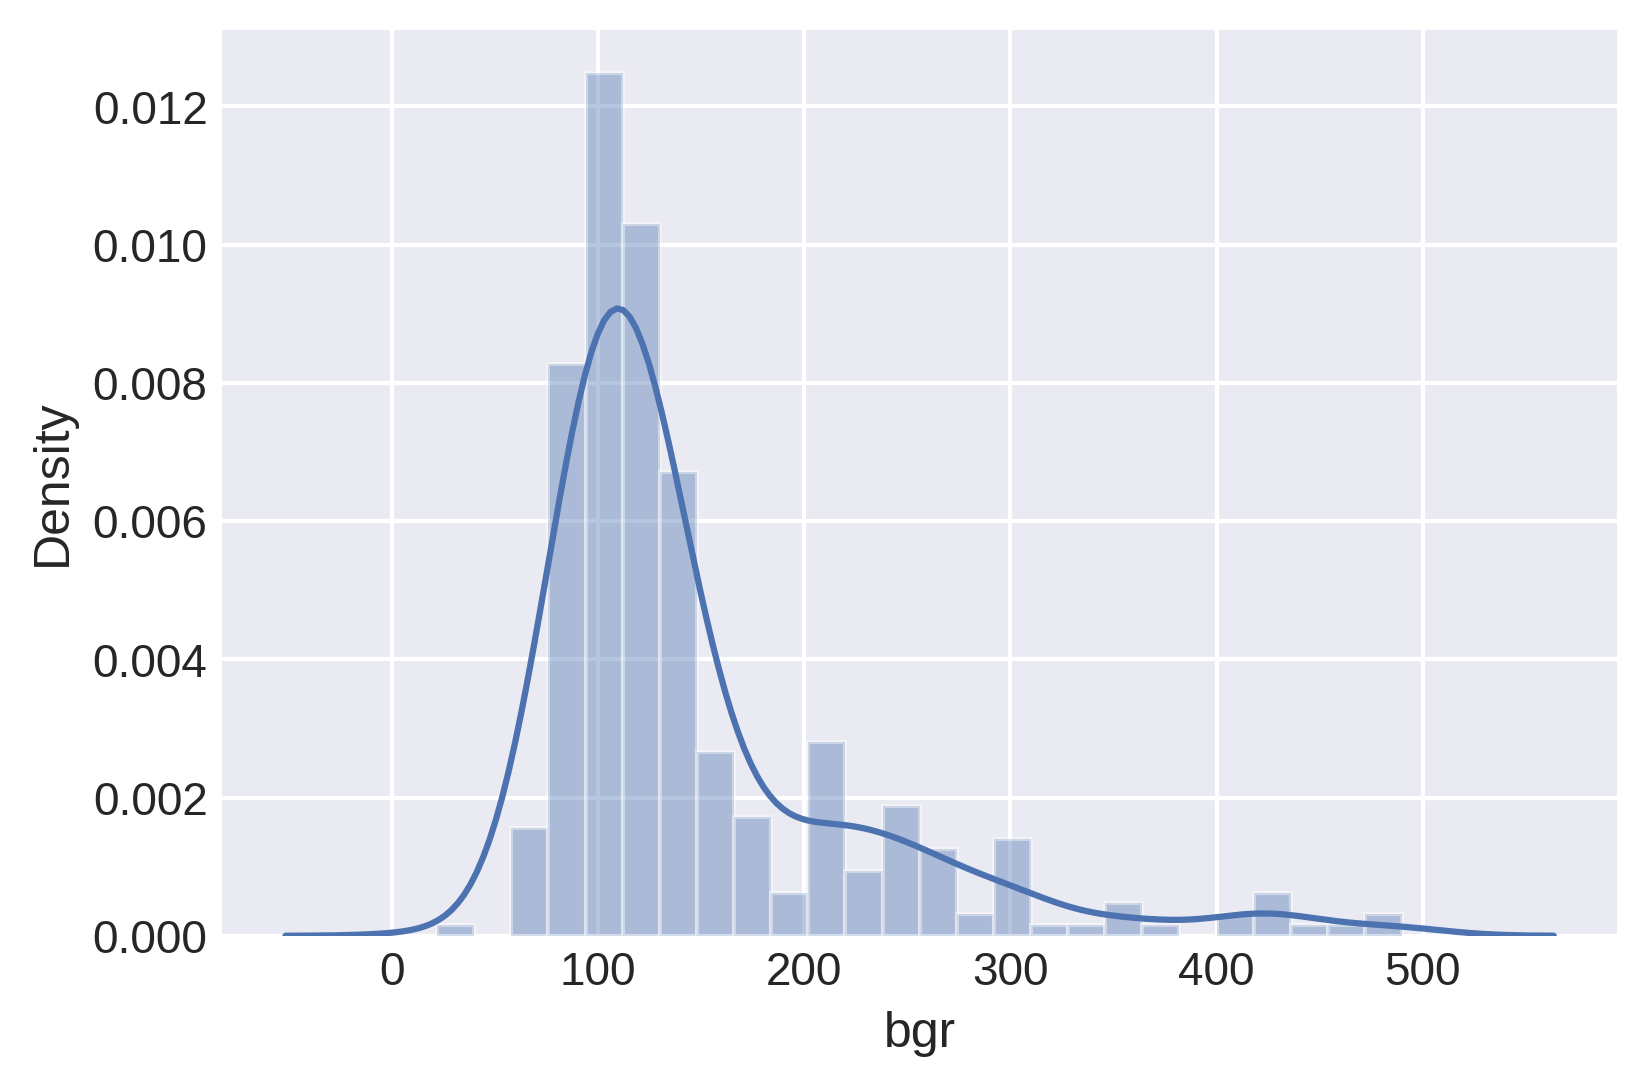

In [38]:
sns.distplot(df.bgr)

- Seems positive skewed so we will replace nan with median

In [39]:
df.bgr.median()

121.0

In [40]:
df.bgr = df.bgr.replace(np.NaN, df.bgr.median())

###bu

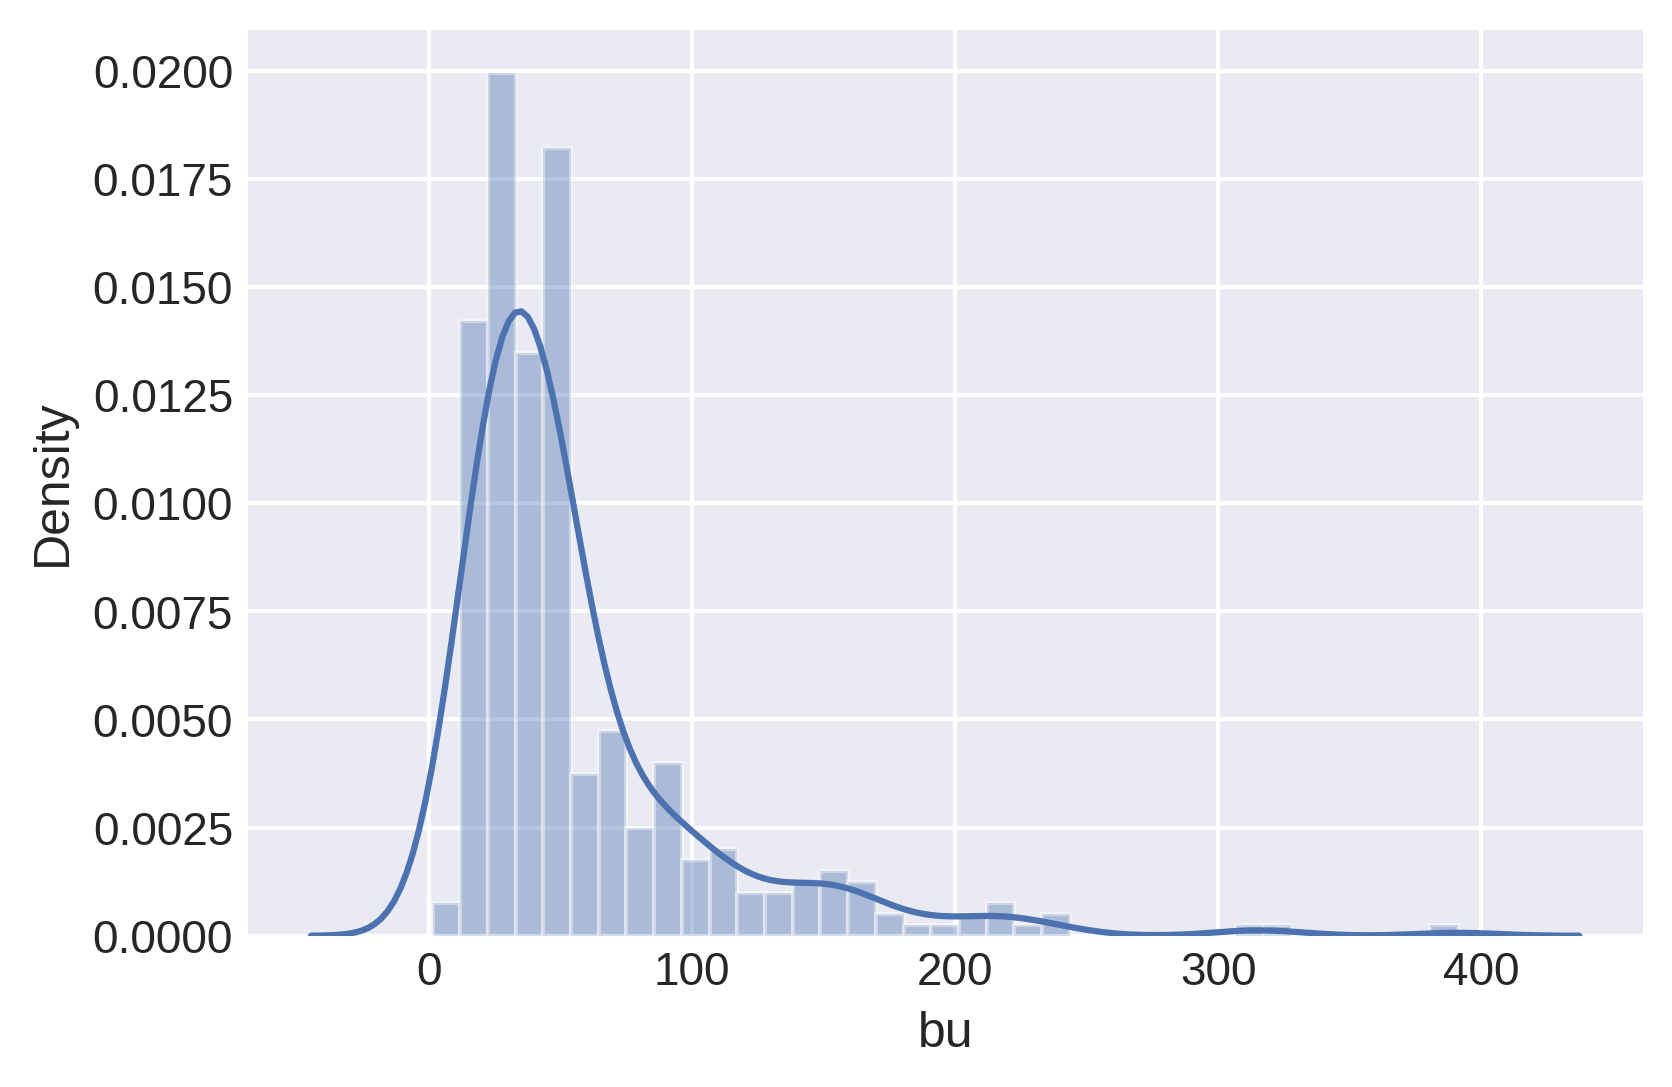

In [41]:
sns.distplot(df.bu)

- Seems positive skewed so we will replace nan with median

In [42]:
df.bu.median()

42.0

In [43]:
df.bu = df.bu.replace(np.NaN, df.bu.median())

###sc

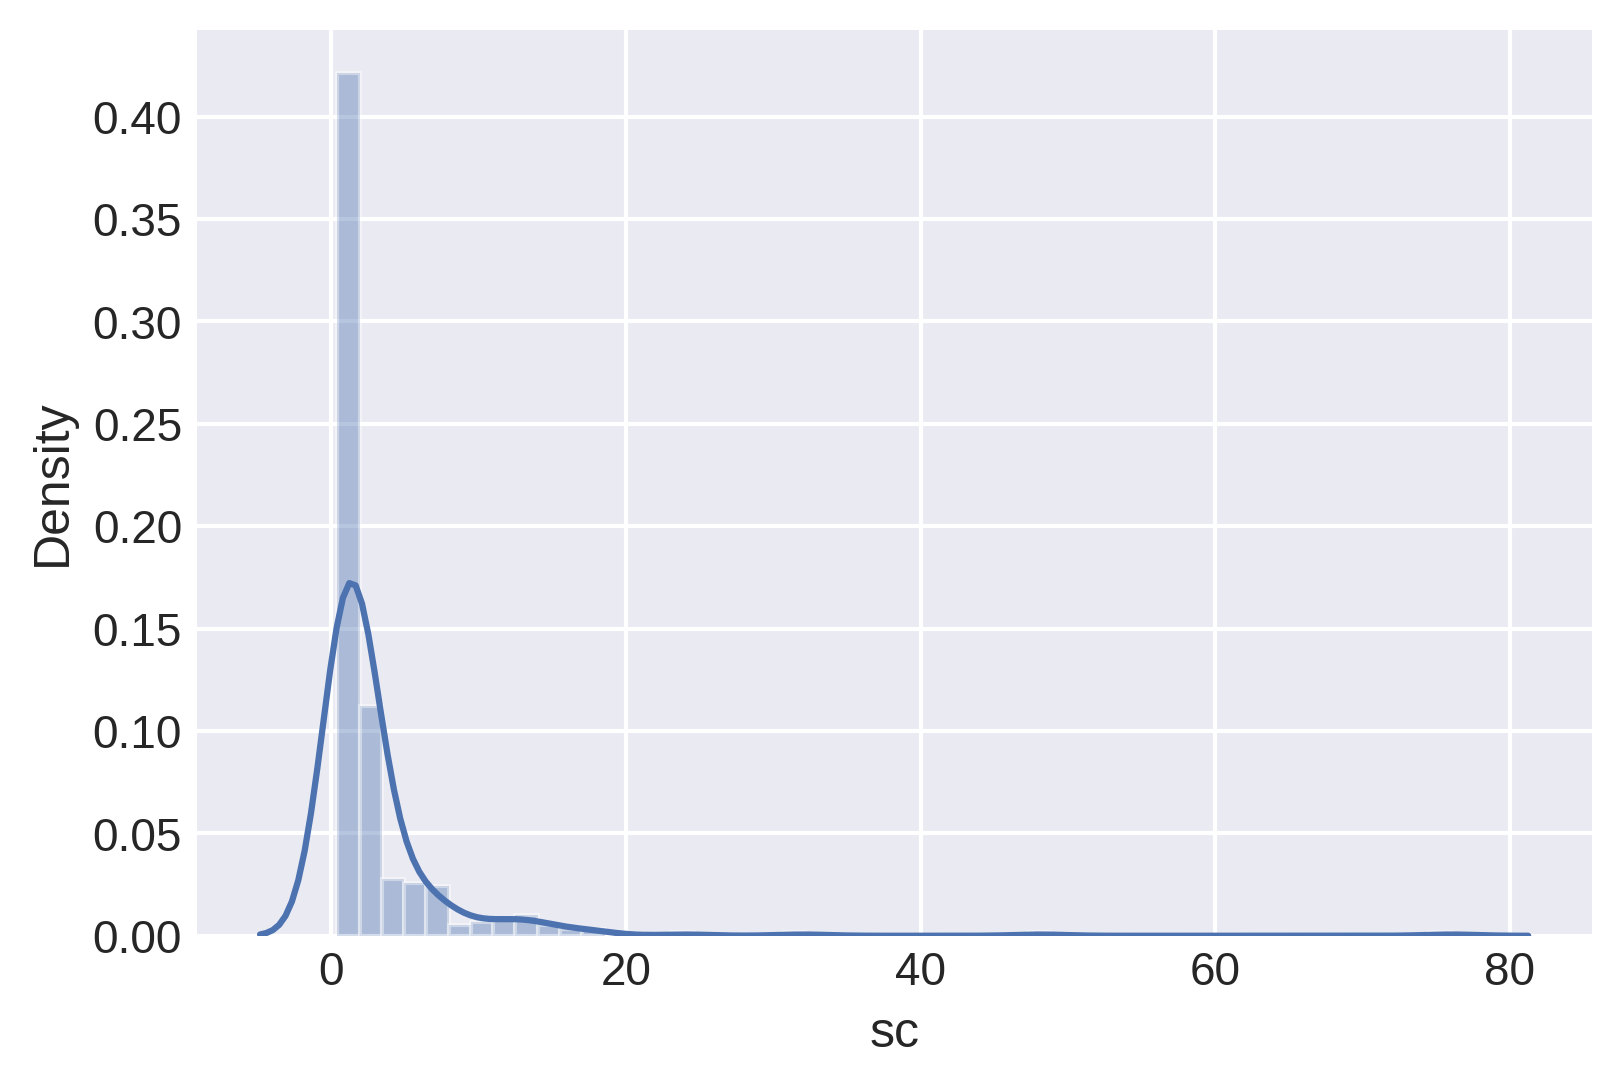

In [44]:
sns.distplot(df.sc)

- Seems positive skewed so we will replace nan with median

In [45]:
df.sc.median()

1.3

In [46]:
df.sc = df.sc.replace(np.NaN, df.sc.median())

###sod

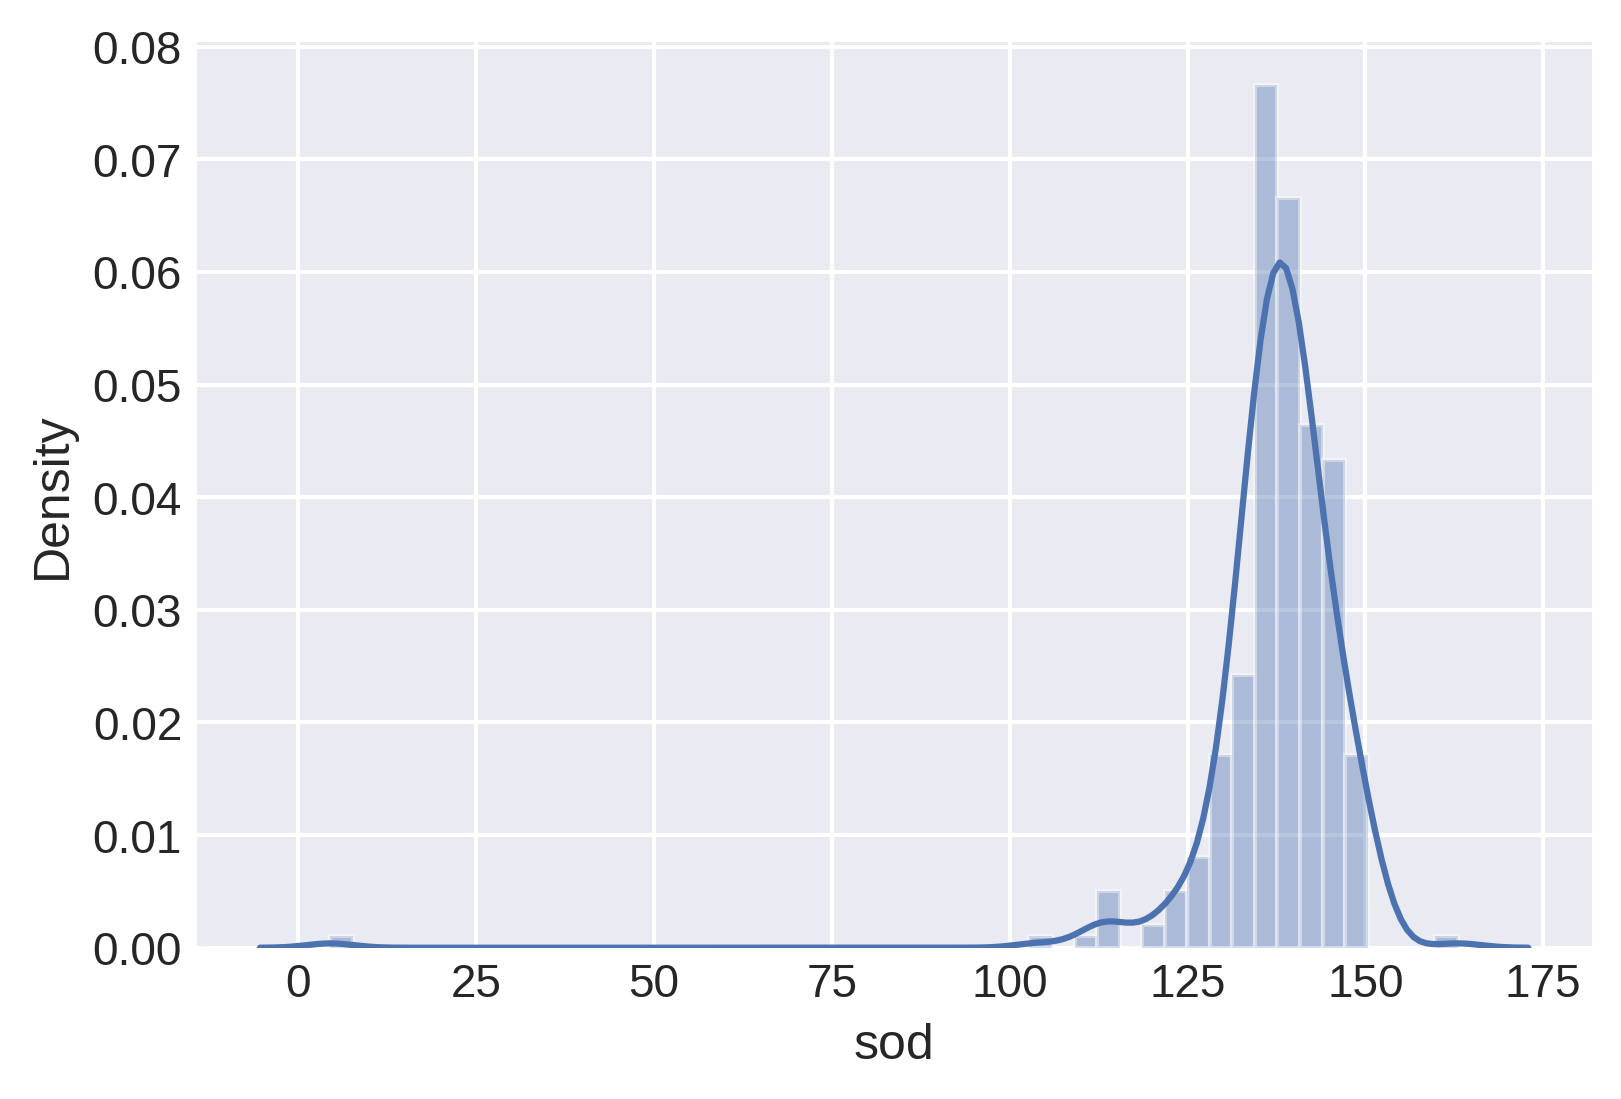

In [47]:
sns.distplot(df.sod)

In [ ]:
df.sod.median()